In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
def format_percentage(value):
    return f"{value:.2f}%"

## **LOAD CLEANED DATASET**

In [3]:
df_all = pd.read_csv('/content/df_olist_clean.csv')
df_all.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,payment_installments,payment_value,product_category_name,seller_city,seller_state,review_score,review_comment_message,review_creation_date,review_answer_timestamp,gap_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,2.0,146.87,office_furniture,itaquaquecetuba,SP,4.0,NaN,2017-05-26 00:00:00.000000000,2017-05-30 22:34:40,5.499363
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-29 12:41:19,2018-02-06,...,8.0,335.48,housewares,itajai,SC,5.0,NaN,2018-01-30 00:00:00.000000000,2018-02-10 22:43:29,12.418171
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-14 17:58:51,2018-06-13,...,7.0,157.73,office_furniture,itaquaquecetuba,SP,5.0,NaN,2018-06-15 00:00:00.000000000,2018-06-15 12:10:59,0.758426
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-28 16:04:25,2018-04-10,...,1.0,173.30,office_furniture,itaquaquecetuba,SP,5.0,NaN,2018-03-29 00:00:00.000000000,2018-04-02 18:36:47,5.105810
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-08-09 20:55:48,2018-08-15,...,8.0,252.25,home_confort,ibitinga,SP,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00.000000000,2018-08-17 01:59:52,7.211157


In [ ]:
sample_check = df_all[df_all['customer_unique_id'].isin(customer_ids)][['customer_unique_id','product_id','product_category_name']]
sample_check

In [4]:
df_all.shape

(114085, 27)

In [5]:
pd.DataFrame({
    'Features': df_all.columns.values,
    'Data Type': df_all.dtypes.values,
    'Data Count': df_all.count().values,
    'Duplicate Data': df_all.duplicated().sum(),
    'Null Value Count': df_all.isnull().sum().values,
    'Null Value Percentage': [format_percentage(val / len(df_all) * 100) for val in df_all.isnull().sum().values],
    'Number of Unique Value': df_all.nunique().values,
    'Unique Value': [df_all[col].unique() for col in df_all.columns]
})

,Features,Data Type,Data Count,Duplicate Data,Null Value Count,Null Value Percentage,Number of Unique Value,Unique Value
0,customer_id,object,114085,0,0,0.00%,95146,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,114085,0,0,0.00%,92098,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_city,object,114085,0,0,0.00%,4073,"[franca, sao bernardo do campo, sao paulo, mog..."
3,customer_state,object,114085,0,0,0.00%,27,"[SP, SC, PR, MG, RJ, RS, PA, GO, ES, BA, MA, M..."
4,order_id,object,114085,0,0,0.00%,95146,"[00e7ee1b050b8499577073aeb2a297a1, 29150127e66..."
5,order_status,object,114085,0,0,0.00%,1,[delivered]
6,order_purchase_timestamp,object,114085,0,0,0.00%,94642,"[2017-05-16 15:05:35, 2018-01-12 20:48:24, 201..."
7,order_approved_at,object,114085,0,0,0.00%,90438,"[2017-05-16 15:22:12, 2018-01-12 20:58:32, 201..."
8,order_delivered_customer_date,object,114085,0,0,0.00%,94357,"[2017-05-25 10:35:35, 2018-01-29 12:41:19, 201..."
9,order_estimated_delivery_date,object,114085,0,0,0.00%,445,"[2017-06-05, 2018-02-06, 2018-06-13, 2018-04-1..."


In [6]:
df_all.to_csv('sample_data/df_olist_raw.csv', index=False)

## **DATA UNDERSTANDING**

### Load Dataset

In [7]:
df_olist_raw = pd.read_csv('sample_data/df_olist_raw.csv')
df_olist_raw

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,payment_installments,payment_value,product_category_name,seller_city,seller_state,review_score,review_comment_message,review_creation_date,review_answer_timestamp,gap_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,2.0,146.87,office_furniture,itaquaquecetuba,SP,4.0,NaN,2017-05-26 00:00:00.000000000,2017-05-30 22:34:40,5.499363
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-29 12:41:19,2018-02-06,...,8.0,335.48,housewares,itajai,SC,5.0,NaN,2018-01-30 00:00:00.000000000,2018-02-10 22:43:29,12.418171
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-14 17:58:51,2018-06-13,...,7.0,157.73,office_furniture,itaquaquecetuba,SP,5.0,NaN,2018-06-15 00:00:00.000000000,2018-06-15 12:10:59,0.758426
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-28 16:04:25,2018-04-10,...,1.0,173.30,office_furniture,itaquaquecetuba,SP,5.0,NaN,2018-03-29 00:00:00.000000000,2018-04-02 18:36:47,5.105810
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-08-09 20:55:48,2018-08-15,...,8.0,252.25,home_confort,ibitinga,SP,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00.000000000,2018-08-17 01:59:52,7.211157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114080,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-13 20:06:37,2018-04-25,...,6.0,88.78,books_general_interest,garca,SP,4.0,NaN,2018-04-14 00:00:00.000000000,2018-04-28 11:15:04,14.630868
114081,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-11 18:54:45,2018-04-20,...,3.0,129.06,sports_leisure,araraquara,SP,5.0,NaN,2018-04-12 00:00:00.000000000,2018-04-16 10:36:05,4.653704
114082,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-05-09 19:03:15,2018-05-02,...,5.0,56.04,health_beauty,sao paulo,SP,1.0,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00.000000000,2018-05-08 01:41:07,-1.723704
114083,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-16 19:58:39,2017-12-05,...,2.0,711.07,watches_gifts,guariba,SP,5.0,NaN,2017-11-17 00:00:00.000000000,2017-11-19 23:34:18,3.149757


### Numerical and Categorical Features

(each features description)

### Data Summary

In [8]:
print(f'Total Rows           :', df_olist_raw.shape[0])
print(f'Total Columns        :', df_olist_raw.shape[1])

print('-----------------------------\nData Types Count     :')
print(df_olist_raw.dtypes.value_counts())

pd.DataFrame({
    'Features': df_olist_raw.columns.values,
    'Data Type': df_olist_raw.dtypes.values,
    'Data Count': df_olist_raw.count().values,
    'Duplicate Data': df_olist_raw.duplicated().sum(),
    'Null Value Count': df_olist_raw.isnull().sum().values,
    'Null Value Percentage': [format_percentage(val / len(df_olist_raw) * 100) for val in df_olist_raw.isnull().sum().values],
    'Number of Unique Value': df_olist_raw.nunique().values,
    'Unique Value': [df_olist_raw[col].unique() for col in df_olist_raw.columns]
})

Total Rows           : 114085
Total Columns        : 27
-----------------------------
Data Types Count     :
object     19
float64     8
Name: count, dtype: int64


,Features,Data Type,Data Count,Duplicate Data,Null Value Count,Null Value Percentage,Number of Unique Value,Unique Value
0,customer_id,object,114085,0,0,0.00%,95146,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,114085,0,0,0.00%,92098,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_city,object,114085,0,0,0.00%,4073,"[franca, sao bernardo do campo, sao paulo, mog..."
3,customer_state,object,114085,0,0,0.00%,27,"[SP, SC, PR, MG, RJ, RS, PA, GO, ES, BA, MA, M..."
4,order_id,object,114085,0,0,0.00%,95146,"[00e7ee1b050b8499577073aeb2a297a1, 29150127e66..."
5,order_status,object,114085,0,0,0.00%,1,[delivered]
6,order_purchase_timestamp,object,114085,0,0,0.00%,94642,"[2017-05-16 15:05:35, 2018-01-12 20:48:24, 201..."
7,order_approved_at,object,114085,0,0,0.00%,90438,"[2017-05-16 15:22:12, 2018-01-12 20:58:32, 201..."
8,order_delivered_customer_date,object,114085,0,0,0.00%,94357,"[2017-05-25 10:35:35, 2018-01-29 12:41:19, 201..."
9,order_estimated_delivery_date,object,114085,0,0,0.00%,445,"[2017-06-05, 2018-02-06, 2018-06-13, 2018-04-1..."


### Statistical Description for Numerical and Categorical Features

In [9]:
# numerical features descriptive statistics
df_olist_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,114085.0,1.197511,0.703119,1.000000,1.0000,1.000000,1.000000,21.000000
price,114085.0,120.031291,182.472493,0.850000,39.9000,74.900000,133.000000,6735.000000
freight_value,114085.0,20.009345,15.725781,0.000000,13.0800,16.320000,21.190000,409.680000
payment_sequential,114085.0,1.090511,0.684452,1.000000,1.0000,1.000000,1.000000,26.000000
payment_installments,114085.0,2.946058,2.781496,0.000000,1.0000,2.000000,4.000000,24.000000
payment_value,114085.0,172.154077,266.161922,0.000000,60.9500,108.070000,189.370000,13664.080000
review_score,114085.0,4.086935,1.343014,1.000000,4.0000,5.000000,5.000000,5.000000
gap_time,113236.0,2.960263,10.882336,-186.761065,1.2359,1.936279,3.489048,518.979074


In [10]:
# categorical features descriptive statistics
df_olist_raw.describe(include='object').T

,count,unique,top,freq
customer_id,114085,95146,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,114085,92098,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,114085,4073,sao paulo,18001
customer_state,114085,27,SP,48131
order_id,114085,95146,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,114085,1,delivered,114085
order_purchase_timestamp,114085,94642,2017-08-08 20:26:31,63
order_approved_at,114085,90438,2017-08-08 20:43:31,63
order_delivered_customer_date,114085,94357,2017-08-14 12:46:18,63
order_estimated_delivery_date,114085,445,2017-12-20,644


### Missing Values

In [11]:
# checking missing value and its percentage
missing_values = df_olist_raw.isna().sum()
missing_percentage = missing_values / len(df_olist_raw) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': [f"{x:.2f}%" for x in missing_percentage]
})

missing_info = missing_info[missing_info['Missing Values'] > 0]
missing_info

,Missing Values,Percentage
review_comment_message,66707,58.47%
gap_time,849,0.74%


### Data Duplicates

In [12]:
# checking duplicate data
sum = df_olist_raw.duplicated().sum()
percentage = df_olist_raw.duplicated().sum()/len(df_olist_raw)*100

print(f'Total Data Duplicates     : {sum}\nData Duplicates Percentage: {percentage:.2f}%')

Total Data Duplicates     : 0
Data Duplicates Percentage: 0.00%


### Numerical Features Analysis (Data Distribution and Outliers)

## **DATA PREPARATION**

### Data Cleaning

Handling Missing Values

### Exploratory Data Analysis (EDA)

In [13]:
# order_summary = df_all.groupby('order_id').agg({
#     'customer_unique_id': 'first',  # Assuming each order_id is linked to a single customer_unique_id
#     'customer_id': 'first',         # Same assumption for customer_id
#     'order_item_id': lambda x: list(x.dropna().astype(str)),  # List all item IDs
#     'product_id': lambda x: list(x.dropna().astype(str)),      # List all product IDs
#     'seller_id': lambda x: list(x.dropna().astype(str)),      # List all seller IDs
#     'product_category_name_english': lambda x: list(x.dropna()),  # List all product categories
#     'price': lambda x: list(x),  # List all prices for the products in the order
#     'freight_value': lambda x: list(x),  # List all freight values for the products in the order
#     'payment_type': lambda x: list(x.dropna()),  # List all payment types
#     'payment_value': lambda x: list(x),  # List all payment values
#     'order_purchase_timestamp': lambda x: list(x.dropna().astype(str)),  # List all timestamps
#     'order_delivered_customer_date': lambda x: list(x.dropna().astype(str)),  # List all delivery dates
#     'order_status': lambda x: list(x.dropna()),  # List all statuses
#     'review_score': lambda x: list(x)  # List all review scores
# }).reset_index()

# # Display the summary
# order_summary

In [14]:
# df_all[df_all['order_id'] == '005d9a5423d47281ac463a968b3936fb']

In [15]:
df_all

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,payment_installments,payment_value,product_category_name,seller_city,seller_state,review_score,review_comment_message,review_creation_date,review_answer_timestamp,gap_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,2.0,146.87,office_furniture,itaquaquecetuba,SP,4.0,NaN,2017-05-26 00:00:00.000000000,2017-05-30 22:34:40,5.499363
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-29 12:41:19,2018-02-06,...,8.0,335.48,housewares,itajai,SC,5.0,NaN,2018-01-30 00:00:00.000000000,2018-02-10 22:43:29,12.418171
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-14 17:58:51,2018-06-13,...,7.0,157.73,office_furniture,itaquaquecetuba,SP,5.0,NaN,2018-06-15 00:00:00.000000000,2018-06-15 12:10:59,0.758426
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-28 16:04:25,2018-04-10,...,1.0,173.30,office_furniture,itaquaquecetuba,SP,5.0,NaN,2018-03-29 00:00:00.000000000,2018-04-02 18:36:47,5.105810
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-08-09 20:55:48,2018-08-15,...,8.0,252.25,home_confort,ibitinga,SP,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00.000000000,2018-08-17 01:59:52,7.211157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114080,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-13 20:06:37,2018-04-25,...,6.0,88.78,books_general_interest,garca,SP,4.0,NaN,2018-04-14 00:00:00.000000000,2018-04-28 11:15:04,14.630868
114081,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-11 18:54:45,2018-04-20,...,3.0,129.06,sports_leisure,araraquara,SP,5.0,NaN,2018-04-12 00:00:00.000000000,2018-04-16 10:36:05,4.653704
114082,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-05-09 19:03:15,2018-05-02,...,5.0,56.04,health_beauty,sao paulo,SP,1.0,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00.000000000,2018-05-08 01:41:07,-1.723704
114083,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-16 19:58:39,2017-12-05,...,2.0,711.07,watches_gifts,guariba,SP,5.0,NaN,2017-11-17 00:00:00.000000000,2017-11-19 23:34:18,3.149757


### **Single vs Multiple Products within Single Order**

In [16]:
# Count the number of transactions for each unique customer
transaction_count = df_all.groupby('customer_unique_id').size()

# Convert to DataFrame for better handling
transaction_count_df = transaction_count.reset_index()
transaction_count_df.columns = ['customer_unique_id', 'number_of_transactions']

transaction_count_df['number_of_transactions'].value_counts().sort_index()

,count
number_of_transactions,
1,78220
2,10113
3,1968
4,936
5,325
6,289
7,70
8,45
9,24


## EDA

<Axes: >

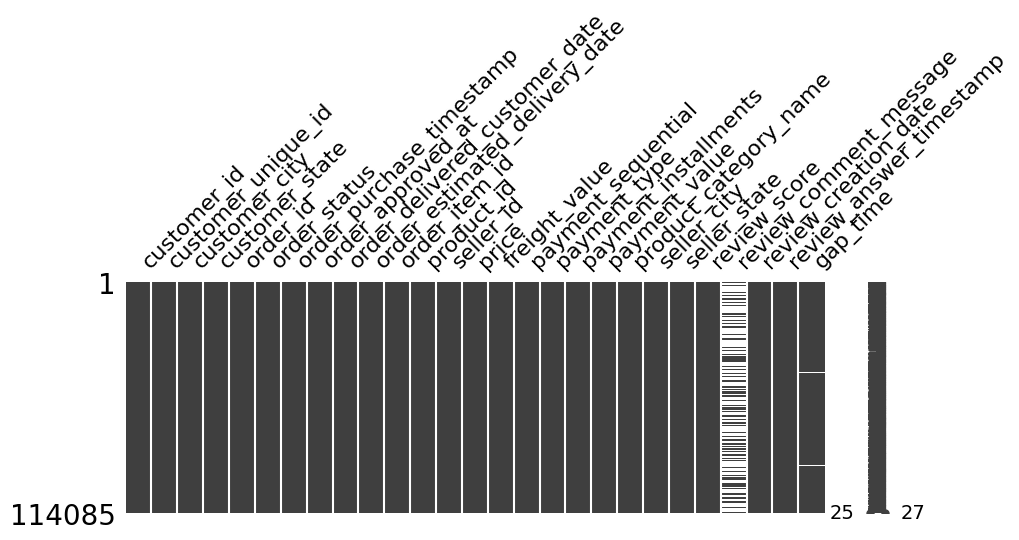

In [17]:
import missingno as msn

# missing values
msn.matrix(df_all, figsize=(10,3))

In [18]:
pd.DataFrame({
    'Data Features': df_all.columns.values,
    'Data Type' : df_all.columns.dtype,
    'Null Value(%)': df_all.isna().mean().values * 100,
    'Duplicate Data' : df_all.duplicated().sum(),
    'Nunique Data': df_all.nunique().values,
    'Sample Unique': [df_all[col].unique() for col in df_all.columns]}
).round(3)

,Data Features,Data Type,Null Value(%),Duplicate Data,Nunique Data,Sample Unique
0,customer_id,object,0.000,0,95146,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,0.000,0,92098,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_city,object,0.000,0,4073,"[franca, sao bernardo do campo, sao paulo, mog..."
3,customer_state,object,0.000,0,27,"[SP, SC, PR, MG, RJ, RS, PA, GO, ES, BA, MA, M..."
4,order_id,object,0.000,0,95146,"[00e7ee1b050b8499577073aeb2a297a1, 29150127e66..."
5,order_status,object,0.000,0,1,[delivered]
6,order_purchase_timestamp,object,0.000,0,94642,"[2017-05-16 15:05:35, 2018-01-12 20:48:24, 201..."
7,order_approved_at,object,0.000,0,90438,"[2017-05-16 15:22:12, 2018-01-12 20:58:32, 201..."
8,order_delivered_customer_date,object,0.000,0,94357,"[2017-05-25 10:35:35, 2018-01-29 12:41:19, 201..."
9,order_estimated_delivery_date,object,0.000,0,445,"[2017-06-05, 2018-02-06, 2018-06-13, 2018-04-1..."


In [19]:
# df_all.info()

## Creating Sample Customer for Final Performance Check ##

In [20]:
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all['order_purchase_timestamp'])
print(df_all['order_purchase_timestamp'].dtype)


datetime64[ns]


In [21]:
df_all.shape

(114085, 27)

In [22]:
# Group by customer unique ID and count the number of orders
grouped_data = df_all.groupby('customer_unique_id').size().reset_index(name='order_count')

# Filter customers with more than 1 order
customers_with_multiple_orders = grouped_data[grouped_data['order_count'] > 1]

# Print customer unique IDs
customers_with_multiple_orders[['customer_unique_id','order_count']].head(5)

,customer_unique_id,order_count
7,00053a61a98854899e70ed204dd4bafe,2
15,000bfa1d2f1a41876493be685390d6d3,2
18,000de6019bb59f34c099a907c151d855,2
19,000e309254ab1fc5ba99dd469d36bdb4,2
22,000fbf0473c10fc1ab6f8d2d286ce20c,4


In [23]:
# Extract customer unique IDs into a list
customer_ids = customers_with_multiple_orders['customer_unique_id'].head(5).tolist()
customer_ids

['00053a61a98854899e70ed204dd4bafe',
 '000bfa1d2f1a41876493be685390d6d3',
 '000de6019bb59f34c099a907c151d855',
 '000e309254ab1fc5ba99dd469d36bdb4',
 '000fbf0473c10fc1ab6f8d2d286ce20c']

In [24]:
# # Sort the dataframe by customer_unique_id and order_purchase_timestamp
# df_all.sort_values(['customer_unique_id', 'order_purchase_timestamp'], inplace=True)

# # Create a new column to indicate the first order for each customer
# df_all['first_order'] = df_all.groupby('customer_unique_id').cumcount() == 0

# # Filter for repeat orders of the 5 specific customers
# df_check = df_all[(df_all['first_order'] == False) & df_all['customer_unique_id'].isin(customer_ids)]

# # Drop the 'first_order' column
# df_check.drop(columns=['first_order'], inplace=True)

# # Drop the 'first_order' column
# df_all.drop(columns=['first_order'], inplace=True)



In [25]:
# # Group by customer unique ID and count the number of orders
# grouped_data = df_all.groupby('customer_unique_id').size().reset_index(name='order_count')

# grouped_data[grouped_data['customer_unique_id'].isin(customer_ids)]

## Modelling

In [26]:
!pip install surprise

In [27]:
df_all.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'seller_city', 'seller_state', 'review_score',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'gap_time'],
      dtype='object')

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from sklearn.metrics.pairwise import cosine_similarity



In [29]:
df_all.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'seller_city', 'seller_state', 'review_score',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'gap_time'],
      dtype='object')

In [30]:
# Create Factorization to Customer , Product and Seller id
df_all["customer_unique_id_f"] = pd.factorize(df_all["customer_unique_id"], sort=True)[0] + 1
df_all["customer_unique_id_f"] = df_all["customer_unique_id_f"].apply(lambda x: f"C{x}")

df_all["product_id_f"] = pd.factorize(df_all["product_id"], sort=True)[0] + 1
df_all["product_id_f"] = df_all["product_id_f"].apply(lambda x: f"P{x}")

df_all[['customer_unique_id','customer_unique_id_f','product_id','product_id_f']]

,customer_unique_id,customer_unique_id_f,product_id,product_id_f
0,861eff4711a542e4b93843c6dd7febb0,C48272,a9516a079e37a9c9c36b9b78b10169e8,P20845
1,290c77bc529b7ac935b93aa66c333dc3,C14788,4aa6014eceb682077f9dc4bffebc05b0,P9335
2,060e732b5b29e8181a18229c7b0b2b5e,C2174,bd07b66896d6f1494f5b86251848ced7,P23317
3,259dac757896d24d7702b9acbbff3f3c,C13604,a5647c44af977b148e0a3a4751a09e2e,P20373
4,345ecd01c38d18a9036ed96c73b8d066,C18911,9391a573abe00141c56e38d84d7d5b3b,P18210
...,...,...,...,...
114080,1a29b476fee25c95fbafc67c5ac95cf8,C9485,ccb4503d9d43d245d3b295d0544f988b,P25321
114081,d52a67c98be1cf6a5c84435bd38d095d,C76878,9ede6b0570a75a4b9de4f383329f99ee,P19640
114082,e9f50caf99f032f0bf3c55141f019d99,C84253,7a5d2e1e131a860ae7d18f6fffa9d689,P15242
114083,73c2643a0a458b49f58cea58833b192e,C41734,f819f0c84a64f02d3a5606ca95edd272,P30662


## Feature Engineering ##

In [31]:
# Calculate seller average review score
df_all['seller_avg_review_score'] = df_all.groupby('seller_id')['review_score'].transform('mean')

In [32]:
df_collab = df_all.groupby(['customer_unique_id', 'product_id'])['review_score'].agg('mean').reset_index()
df_collab = df_collab.rename(columns={'review_score': 'rating'})


df_content = df_all[['product_id',
                     'product_category_name']].drop_duplicates()


In [33]:
df_collab.head()

,customer_unique_id,product_id,rating
0,0000366f3b9a7992bf8c76cfdf3221e2,372645c7439f9661fbbacfd129aa92ec,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5099f7000472b634fea8304448d20825,4.0
2,0000f46a3911fa3c0805444483337064,64b488de448a5324c4134ea39c28a34b,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2345a354a6f2033609bbf62bf5be9ef6,4.0
4,0004aac84e0df4da2b147fca70cf8255,c72e18b3fe2739b8d24ebf3102450f37,5.0


The difference in recommendations between content-based filtering and collaborative filtering comes from the underlying mechanisms of how these methods work:

**1. Content-Based Filtering:**

**How it works:** Content-based filtering recommends items that are similar to those a user has liked in the past, based on the features of the items themselves. In this case, features like product_category_name_english are used to find similarities between items.

Since the method is based on features (like category, description length, etc.), it will naturally recommend items that are similar to those the user has interacted with in the same category. For example, if the user likes electronics, content-based filtering will recommend other electronics products, as they share similar attributes (e.g., category).

**2. Collaborative Filtering:**

**How it works:** Collaborative filtering uses the preferences of many users to make recommendations. It looks at what other users with similar tastes have liked and recommends those items to you, regardless of the content or category of the items.

Collaborative filtering does not directly consider item features like categories. Instead, it looks at patterns of user behavior. If other users who liked the same items as you have also liked items in different categories, it may recommend those cross-category items to you. This is why collaborative filtering can recommend items from different categories—because it leverages user behavior patterns, not just item similarities.

**Conclusion:**

**Content-Based Filtering** is based solely on the similarity of item features.

**Collaborative Filtering** considers user preferences based on their ratings of other items.

## Collaborative Filtering ##

In [34]:
#Identify customers with more than one occurrence (Repeat Customer)
repeat = df_all.groupby('customer_unique_id').filter(lambda x: len(x) > 1)
repeat['repeat'] = 1
repeat.shape

(35865, 31)

In [35]:
#Identify customers with one occurrence (First Time Customer)
new = df_all.groupby('customer_unique_id').filter(lambda x: len(x) == 1).reset_index(drop=True)
new['repeat'] = 0
new.shape

(78220, 31)

In [36]:

df_full = pd.concat((repeat, new), axis=0).reset_index(drop=True)

In [37]:
df_collaborative = repeat.groupby(['customer_unique_id','product_id'])['review_score'].agg(['mean']).reset_index()
df_collaborative = df_collaborative.rename({'mean':'estimator', 'product_id':'productId'}, axis=1)

In [38]:
df_collaborative.sort_values(by='estimator', ascending=False)

,customer_unique_id,productId,estimator
20166,fffcf5a5ff07b0908bd4e2dbc735a684,c100e5fef1abb5e1c5054d1dac2d83ac,5.0
10062,816b6a32903cb4376b7022e10d5aae9e,dc52f0f5d3ec37a93eaf956cde4e5d2c,5.0
10049,814d12af84beb46ade17b81e5a01a38c,7b1c12cfed7333cdc1dc8e4a20752613,5.0
10051,8150b1391aedaa88da5dfffa55df6eea,3e19791ee3fa124c96da5a87616794ac,5.0
10053,815a99cb9852a1011da9bb7f2070b93e,349b69653420b6014582513d4ce6c934,5.0
...,...,...,...
11345,919b613e7aa171cb4ca017c049fbc5da,08574b074924071f4e201e151b152b4e,1.0
11344,919a862b7515e8ad7dc8bfe5f9b327fa,c7fd13b5e515bffdab855d0812842edb,1.0
11334,91798cca876208ae649532488494682b,054515fd15bc1a2029f10de97ffa9120,1.0
11328,916eab4910e6e69446d9338f4dcc9148,61a53738adc5c0e8d243553320f9ba1c,1.0


In [39]:
null =df_collaborative.isnull().sum()
null

,0
customer_unique_id,0
productId,0
estimator,0


In [40]:
df_collaborative = df_collaborative.dropna(subset=['estimator'])

In [41]:
# Scaling for Feature of Raw Rating
scaler = (df_collaborative.estimator.min(), df_collaborative.estimator.max())
reader = Reader(rating_scale=scaler)

In [42]:
#Load the dataframe
data = Dataset.load_from_df(df_collaborative[['customer_unique_id','productId', 'estimator']], reader)

In [43]:
import random

random.seed(42)

#shuffle the user, item, rating for unbiased result
all_collab = data.raw_ratings
random.shuffle(all_collab)

In [44]:
#split data with ratio 80:20 into train (set A) and test data (set B)
threshold = int(0.8 * len(all_collab))
train_raw_collab = all_collab[:threshold]
test_raw_collab = all_collab[threshold:]

In [45]:
listed = [all_collab, train_raw_collab, test_raw_collab]
names = ['all_collab', 'train_raw_ratings', 'test_raw_ratings']

for i, lis in enumerate(listed):
    count = len(lis)
    print(f"Shape of {names[i]}: {count}")

Shape of all_collab: 20167
Shape of train_raw_ratings: 16133
Shape of test_raw_ratings: 4034


In [46]:
#insert train_raw_collab into data
data.raw_ratings = train_raw_collab

In [47]:
from surprise import accuracy, Reader, Dataset
from surprise import NormalPredictor, KNNBasic, SVD, SVDpp, CoClustering, SlopeOne, NMF, KNNBaseline
from surprise.model_selection import cross_validate, KFold, GridSearchCV, train_test_split

In [48]:
# Define the NormalPredictor model
normpr = NormalPredictor()

# Cross-validation
np_result = cross_validate(normpr, data, measures=['RMSE'], cv=5, verbose=False, n_jobs=2)

# Training the model
trainset = data.build_full_trainset()
normpr.fit(trainset)

# Calculate RMSE
np_pred_train = normpr.test(trainset.build_testset())
np_rmse_train = accuracy.rmse(np_pred_train, verbose=False)

# Load and calculate RMSE on the testset
testset = data.construct_testset(test_raw_collab)
np_pred_test = normpr.test(testset)
np_rmse_test = accuracy.rmse(np_pred_test, verbose=False)

In [49]:
# Define the SVD model
svd = SVD(n_factors=30, n_epochs=25, biased=True, lr_all=0.00004, reg_all=0.4, verbose=False, random_state=47)

# Cross-validation
svd_result = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=False, n_jobs=2)

# Training the model
trainset = data.build_full_trainset()
svd.fit(trainset)

# Calculate RMSE
svd_pred_train = svd.test(trainset.build_testset())
svd_rmse_train = accuracy.rmse(svd_pred_train, verbose=False)

# Load and calculate RMSE on the testset
testset = data.construct_testset(test_raw_collab)
svd_pred_test = svd.test(testset)
svd_rmse_test = accuracy.rmse(svd_pred_test, verbose=False)

In [50]:
# Define the SVDpp model
svdpp = SVDpp(n_factors=50, n_epochs=20, lr_all=0.00008, reg_all=0.4, verbose=False, random_state=47)

# Cross-validation
svdpp_result = cross_validate(svdpp, data, measures=['RMSE'], cv=5, verbose=False, n_jobs=2)

# Training the model
trainset = data.build_full_trainset()
svdpp.fit(trainset)

# Calculate RMSE
svdpp_pred_train = svdpp.test(trainset.build_testset())
svdpp_rmse_train = accuracy.rmse(svdpp_pred_train, verbose=False)

# Load and calculate RMSE on the testset
testset = data.construct_testset(test_raw_collab)
svdpp_pred_test = svdpp.test(testset)
svdpp_rmse_test = accuracy.rmse(svdpp_pred_test, verbose=False)


In [51]:
# Define the NMF model
nmf = NMF(n_factors=20, n_epochs=30, lr_bu=0.0000001, lr_bi=0.0000001, reg_pu=5, reg_qi=5, biased=True, random_state=47)

# Cross-validation
nmf_result = cross_validate(nmf, data, measures=['RMSE'], cv=5, verbose=False, n_jobs=2)

# Training the model
trainset = data.build_full_trainset()
nmf.fit(trainset)

# Calculate RMSE
nmf_pred_train = nmf.test(trainset.build_testset())
nmf_rmse_train = accuracy.rmse(nmf_pred_train, verbose=False)

# Load and calculate RMSE on the testset
testset = data.construct_testset(test_raw_collab)
nmf_pred_test = nmf.test(testset)
nmf_rmse_test = accuracy.rmse(nmf_pred_test, verbose=False)


In [52]:

# Define the KNNBasic model
knnb = KNNBasic(sim_options={'name': 'cosine', 'user_based': False}, verbose=False, random_state=47)

# Cross-validation
knnb_result = cross_validate(knnb, data, measures=['RMSE'], cv=5, verbose=False, n_jobs=2)

# Training the model
trainset = data.build_full_trainset()
knnb.fit(trainset)

# Calculate RMSE
knnb_pred_train = knnb.test(trainset.build_testset())
knnb_rmse_train = accuracy.rmse(knnb_pred_train, verbose=False)

# Load and calculate RMSE on the testset
testset = data.construct_testset(test_raw_collab)
knnb_pred_test = knnb.test(testset)
knnb_rmse_test = accuracy.rmse(knnb_pred_test, verbose=False)


In [53]:
# Define the CoClustering model
coc = CoClustering(n_cltr_u=8, n_cltr_i=8, n_epochs=30, random_state=47)

# Cross-validation
coc_result = cross_validate(coc, data, measures=['RMSE'], cv=5, verbose=False, n_jobs=2)

# Training the model
trainset = data.build_full_trainset()
coc.fit(trainset)

# Calculate RMSE
coc_pred_train = coc.test(trainset.build_testset())
coc_rmse_train = accuracy.rmse(coc_pred_train, verbose=False)

# Load and calculate RMSE on the testset
testset = data.construct_testset(test_raw_collab)
coc_pred_test = coc.test(testset)
coc_rmse_test = accuracy.rmse(coc_pred_test, verbose=False)


In [54]:
# Define the SlopeOne model
so = SlopeOne()

# Cross-validation
so_result = cross_validate(so, data, measures=['RMSE'], cv=5, verbose=False, n_jobs=2)

# Training the model
trainset = data.build_full_trainset()
so.fit(trainset)

# Calculate RMSE
so_pred_train = so.test(trainset.build_testset())
so_rmse_train = accuracy.rmse(so_pred_train, verbose=False)

# Load and calculate RMSE on the testset
testset = data.construct_testset(test_raw_collab)
so_pred_test = so.test(testset)
so_rmse_test = accuracy.rmse(so_pred_test, verbose=False)


In [55]:
rec_rmses = [[np_rmse_train, np_rmse_test],
             [svd_rmse_train, svd_rmse_test],
             [svdpp_rmse_train, svd_rmse_test],
             [nmf_rmse_train, nmf_rmse_test],
             [knnb_rmse_train, knnb_rmse_test],
             [coc_rmse_train, coc_rmse_test],
             [so_rmse_train, so_rmse_test]]

rec_model_names = ['normalpred', 'SVD', 'SVD++', 'NMF','KNNBasic','CoClustering','SlopeOne']
df_comparison = pd.DataFrame(rec_rmses, index=rec_model_names)
df_comparison.rename(columns = {0:'RMSE train', 1:'RMSE test'}, inplace = True)
df_comparison.T

,normalpred,SVD,SVD++,NMF,KNNBasic,CoClustering,SlopeOne
RMSE train,1.951833,1.517938,1.513142,1.521896,0.312671,0.418947,0.036590
RMSE test,1.922415,1.512878,1.512878,1.513196,1.475168,1.415982,1.358146


In [56]:
# Scaling for Feature of Raw Rating
scaler = (df_collaborative.estimator.min(), df_collaborative.estimator.max())
reader = Reader(rating_scale=scaler)
#Load the dataframe
data = Dataset.load_from_df(df_collaborative[['customer_unique_id','productId', 'estimator']], reader)

In [57]:
#Hyperparameter Tuning
param_grid = {'n_factors': [25, 50],'n_epochs': [30,50],
              'lr_all': [0.005,0.01],'reg_all':[0.02,0.1]}

gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=5)
gs_svdpp.fit(data)

best_score_svdpp = gs_svdpp.best_score['rmse']
best_param_svdpp = gs_svdpp.best_params['rmse']

print(f'Best score: {best_score_svdpp}')
print(f'Best parameter: {best_param_svdpp}')

# Best score: 1.3868526542546573
# Best parameter: {'n_factors': 25, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}

Best score: 1.360117017239394
Best parameter: {'n_factors': 25, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


In [58]:
# Create the model using the best parameters from GridSearchCV
best_param_svdpp = gs_svdpp.best_params['rmse']
best_model_svdpp = SVDpp(**best_param_svdpp)

# Fit the model on the entire dataset
best_model_svdpp.fit(data.build_full_trainset())

## Content Based Filtering ##

In [59]:
nullcheck = df_content.isnull().sum()
nullcheck

,0
product_id,0
product_category_name,0


In [60]:
# df_content = df_content.dropna(subset=['product_id'])


In [61]:
# Handle missing values (if any)
df_content['product_category_name'] = df_content['product_category_name'].fillna('unknown')

# Text preprocessing (optional, depending on data quality)
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer

# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = nltk.word_tokenize(text.lower())
#     words = [word for word in words if word not in stop_words]
#     words = [stemmer.stem(word) for word in words]
#     return ' '.join(words)

# df_content['product_category_name_english'] = df_content['product_category_name_english'].apply(preprocess_text)

In [62]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_content['product_category_name'])

In [63]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [64]:
def get_recommendations(product_id, df_content, cosine_sim, top_n=5):
    idx = df_content[df_content['product_id'] == product_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Skip the item itself

    # Extract product IDs and categories
    recommended_indices = [i[0] for i in sim_scores]
    recommended_products = df_content.iloc[recommended_indices][['product_id', 'product_category_name']]

    return recommended_products

In [65]:
product_id = 'bd07b66896d6f1494f5b86251848ced7'
recommendations = get_recommendations(product_id, df_content, cosine_sim)
print(recommendations)

                           product_id product_category_name
2    bd07b66896d6f1494f5b86251848ced7      office_furniture
3    a5647c44af977b148e0a3a4751a09e2e      office_furniture
42   8ed094bfe076c568f6bb10feada3f75d      office_furniture
72   aba86c093ccdbac75b09111d57e50004      office_furniture
292  eab67bf937aaadc19f83383a331d2dd9      office_furniture


In [66]:
def get_user_purchased_products(user_id, df_all):
    # Filter df_all to get products bought by the specified user
    user_purchases = df_all[df_all['customer_unique_id'] == user_id]

    # Extract the product IDs of the products purchased by the user
    purchased_product_ids = user_purchases['product_id'].unique()

    return purchased_product_ids



In [67]:
# Content Based Recommendation System Implementation

user_id =   '861eff4711a542e4b93843c6dd7febb0'
get_product_id = get_user_purchased_products(user_id,df_all)
product_id_str = get_product_id[0]
recommendations = get_recommendations(product_id_str, df_content, cosine_sim, top_n=5)

print(get_product_id)
print(recommendations)


['a9516a079e37a9c9c36b9b78b10169e8']
                           product_id product_category_name
2    bd07b66896d6f1494f5b86251848ced7      office_furniture
3    a5647c44af977b148e0a3a4751a09e2e      office_furniture
42   8ed094bfe076c568f6bb10feada3f75d      office_furniture
72   aba86c093ccdbac75b09111d57e50004      office_furniture
292  eab67bf937aaadc19f83383a331d2dd9      office_furniture


In [68]:
df_all[df_all['customer_unique_id']=='290c77bc529b7ac935b93aa66c333dc3'][['customer_unique_id','product_id','order_status','product_category_name']]

,customer_unique_id,product_id,order_status,product_category_name
1,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,delivered,housewares


In [69]:
df_all[['customer_unique_id','product_id','order_status','product_category_name']]

,customer_unique_id,product_id,order_status,product_category_name
0,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,delivered,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,delivered,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,bd07b66896d6f1494f5b86251848ced7,delivered,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,a5647c44af977b148e0a3a4751a09e2e,delivered,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,9391a573abe00141c56e38d84d7d5b3b,delivered,home_confort
...,...,...,...,...
114080,1a29b476fee25c95fbafc67c5ac95cf8,ccb4503d9d43d245d3b295d0544f988b,delivered,books_general_interest
114081,d52a67c98be1cf6a5c84435bd38d095d,9ede6b0570a75a4b9de4f383329f99ee,delivered,sports_leisure
114082,e9f50caf99f032f0bf3c55141f019d99,7a5d2e1e131a860ae7d18f6fffa9d689,delivered,health_beauty
114083,73c2643a0a458b49f58cea58833b192e,f819f0c84a64f02d3a5606ca95edd272,delivered,watches_gifts


In [70]:
# df_content.head()
check = df_content[df_content['product_id']=='8ed094bfe076c568f6bb10feada3f75d']
check

,product_id,product_category_name
42,8ed094bfe076c568f6bb10feada3f75d,office_furniture


## Hybrid Recommendation System ##

In [72]:
df_content.columns

Index(['product_id', 'product_category_name'], dtype='object')

In [73]:
df_collab.columns

Index(['customer_unique_id', 'product_id', 'rating'], dtype='object')

In [74]:
reader = Reader(rating_scale=(1, 5))  # Adjust rating scale if needed
data = Dataset.load_from_df(df_collab[['customer_unique_id', 'product_id', 'rating']], reader)

trainset = data.build_full_trainset()
svdpp = SVDpp()
svdpp.fit(trainset)



In [75]:
svdpp_model = best_model_svdpp

In [76]:
def hybrid_recommendation_system(user_id, df_all, df_content, cosine_sim, svdpp_model, top_n=5):
    # Step 1: Content-Based Recommendation
    get_product_id = get_user_purchased_products(user_id, df_all)
    content_based_recommendations = []

    if get_product_id:  # Ensure user has purchased products
        product_id_str = get_product_id[0]  # Get the first product ID from the list
        content_based_recommendations = get_recommendations(product_id_str, df_content, cosine_sim, top_n=top_n)

    # Step 2: Collaborative Filtering - Get top 2 recommended categories
    user_rated_items = df_all[df_all['customer_unique_id'] == user_id]['product_id'].values

    category_predictions = []
    for product_id in df_content['product_id'].unique():
        if product_id not in user_rated_items:
            pred = svdpp_model.predict(user_id, product_id)
            category = df_content[df_content['product_id'] == product_id]['product_category_name'].values[0]
            category_predictions.append((category, pred.est))

    # Sort and select top 2 categories based on the prediction score
    top_categories = sorted(category_predictions, key=lambda x: x[1], reverse=True)[:2]
    top_categories = [category for category, _ in top_categories]

    # Step 3: Cascade into Content-Based for top 2 categories
    cascade_recommendations = []
    for category in top_categories:
        # Filter products by category
        category_products = df_content[df_content['product_category_name'] == category]['product_id'].values
        for product_id in category_products[:2]:  # Select 2 products for each category
            recs = get_recommendations(product_id, df_content, cosine_sim, top_n=top_n)
            cascade_recommendations.extend(recs[['product_id', 'product_category_name']].values.tolist())

    return {
        "content_based_recommendations": content_based_recommendations,
        "collaborative_filtering_recommendations": cascade_recommendations
    }



In [77]:
user_id = '861eff4711a542e4b93843c6dd7febb0'

# Call the hybrid recommendation system function
recommendations = hybrid_recommendation_system(user_id, df_all, df_content, cosine_sim, svdpp_model)




In [78]:
def print_recommendations(recommendations):
    # Print Content-Based Recommendations
    print("Similar Items:\n")
    for index, row in recommendations["content_based_recommendations"].iterrows():
        print(f"Product ID: {row['product_id']}, Category: {row['product_category_name']}")

    print("\nYou might also like:\n")
    for rec in recommendations["collaborative_filtering_recommendations"]:
        print(f"Product ID: {rec[0]}, Category: {rec[1]}")

# Call the function to print recommendations
print_recommendations(recommendations)


Similar Items:

Product ID: bd07b66896d6f1494f5b86251848ced7, Category: office_furniture
Product ID: a5647c44af977b148e0a3a4751a09e2e, Category: office_furniture
Product ID: 8ed094bfe076c568f6bb10feada3f75d, Category: office_furniture
Product ID: aba86c093ccdbac75b09111d57e50004, Category: office_furniture
Product ID: eab67bf937aaadc19f83383a331d2dd9, Category: office_furniture

You might also like:

Product ID: 138d7037b59dcee052810952c983033b, Category: sports_leisure
Product ID: a8e69cb7ca2c04d5ba7f73b2385f2a76, Category: sports_leisure
Product ID: 8b6ed41158b194711f83b8da92757544, Category: sports_leisure
Product ID: 64f1126c9715d5394b7301934c6833f0, Category: sports_leisure
Product ID: e9b2560544c293e02f2b966041e10f24, Category: sports_leisure
Product ID: a92930c327948861c015c919a0bcb4a8, Category: watches_gifts
Product ID: 28c95d7653177449fd4b6fc7adb63ce9, Category: watches_gifts
Product ID: 461f43be3bdf8844e65b62d9ac2c7a5a, Category: watches_gifts
Product ID: c5b72065154ec27c2d1

In [79]:
df_all[['customer_unique_id','product_id','order_status','product_category_name']].head()

,customer_unique_id,product_id,order_status,product_category_name
0,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,delivered,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,delivered,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,bd07b66896d6f1494f5b86251848ced7,delivered,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,a5647c44af977b148e0a3a4751a09e2e,delivered,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,9391a573abe00141c56e38d84d7d5b3b,delivered,home_confort


In [80]:
df_all[df_all['customer_unique_id']=='0000b849f77a49e4a4ce2b2a4ca5be3f'][['customer_unique_id','product_id','order_status','product_category_name']]

,customer_unique_id,product_id,order_status,product_category_name
28191,0000b849f77a49e4a4ce2b2a4ca5be3f,5099f7000472b634fea8304448d20825,delivered,health_beauty


In [81]:
# user_id = '060e732b5b29e8181a18229c7b0b2b5e'  # Replace with actual user ID
# recommendations = cascade_recommend(user_id)
# print(recommendations)

## Recommendation for New User based on Pupular Item and Area

In [82]:
def find_popular_items(data, n_recs):
    top_n_items = data.product_id.value_counts().sort_values(ascending=False)[:n_recs].index
    return list(top_n_items)

In [83]:
def popular_in_your_area(data, state, n_recs):
    location_df = data[data.customer_state == state]
    top_n_items = location_df.product_id.value_counts().sort_values(ascending=False)[:n_recs].index
    return list(top_n_items)

In [84]:
def first_time_recommender(data, uid, n_recs):
    hot_items = find_popular_items(data, n_recs)
    state = data[data.customer_unique_id==uid].customer_state.max()
    popular_in_area = popular_in_your_area(data, state, n_recs)

    print(f"Hot items you might like:\n {hot_items}\n")
    print(f"Popular items in your area:\n {popular_in_area}")

    recommendation = {'Hot Items': hot_items, 'Area': popular_in_area}

    return recommendation

In [85]:
# Example Recommendation
recommendation = first_time_recommender(df_all, 'c71a196d46a70ec611f3922db5755d1d', 3)

Hot items you might like:
 ['aca2eb7d00ea1a7b8ebd4e68314663af', '99a4788cb24856965c36a24e339b6058', '422879e10f46682990de24d770e7f83d']

Popular items in your area:
 ['aca2eb7d00ea1a7b8ebd4e68314663af', '99a4788cb24856965c36a24e339b6058', '422879e10f46682990de24d770e7f83d']


In [89]:
sample_check = df_all[df_all['customer_unique_id'].isin(customer_ids)][['customer_unique_id','product_id','product_category_name']]
sample_check

,customer_unique_id,product_id,product_category_name
2745,000fbf0473c10fc1ab6f8d2d286ce20c,38021cef829efa264df6f9d21c4df6e9,musical_instruments
2746,000fbf0473c10fc1ab6f8d2d286ce20c,38021cef829efa264df6f9d21c4df6e9,musical_instruments
2747,000fbf0473c10fc1ab6f8d2d286ce20c,d7a3cfa08519494aa1ad181e803617ec,toys
2748,000fbf0473c10fc1ab6f8d2d286ce20c,d7a3cfa08519494aa1ad181e803617ec,toys
3563,000bfa1d2f1a41876493be685390d6d3,bb15f9ba2ec6e36ab6c9e88d17430d64,fashion_bags_accessories
3564,000bfa1d2f1a41876493be685390d6d3,bb15f9ba2ec6e36ab6c9e88d17430d64,fashion_bags_accessories
13467,000de6019bb59f34c099a907c151d855,af0a917aec9cea3b353ece61a8825326,bed_bath_table
13468,000de6019bb59f34c099a907c151d855,9e572ff4654f7064419d97a891a8b0fc,bed_bath_table
69151,000e309254ab1fc5ba99dd469d36bdb4,b73091f98b819cf7a339f74ece86aa4b,fashion_underwear_beach
69152,000e309254ab1fc5ba99dd469d36bdb4,b73091f98b819cf7a339f74ece86aa4b,fashion_underwear_beach


In [ ]:
sample_check = df_all[df_all['customer_unique_id'].isin(customer_ids)][['customer_unique_id','product_id','product_category_name']]
sample_check